In [4]:
!pip install pandas geopandas libpysal
!pip install -U esda

   ---------------------------------------- 0.0/132.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/132.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/132.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/132.4 kB 220.2 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/132.4 kB 220.2 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/132.4 kB 151.3 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/132.4 kB 193.2 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/132.4 kB 193.2 kB/s eta 0:00:01
   --------------------------- ----------- 92.2/132.4 kB 218.5 kB/s eta 0:00:01
   -------------------------------- ----- 112.6/132.4 kB 262.6 kB/s eta 0:00:01
   -------------------------------- ----- 112.6/132.4 kB 262.6 kB/s eta 0:00:01
   -------------------------------- ----- 112.6/132.4 kB 262.6 kB/s eta 0:00:01
   -------------------------------- ----- 112.6/132.4 kB 262.6 kB

C:\Users\rhyth\AppData\Local\Temp\ipykernel_42968\2074393094.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
C:\Users\rhyth\AppData\Local\Temp\ipykernel_42968\2074393094.py:37: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(world)
c:\Python311\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
 There are 16 islands with ids: 0, 8, 10, 20, 23, 26, 28, 31, 55, 56, 58, 62, 63, 68, 69, 70.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
Moran's I: -0.040284638348214274
Moran's I p-value: 0.44


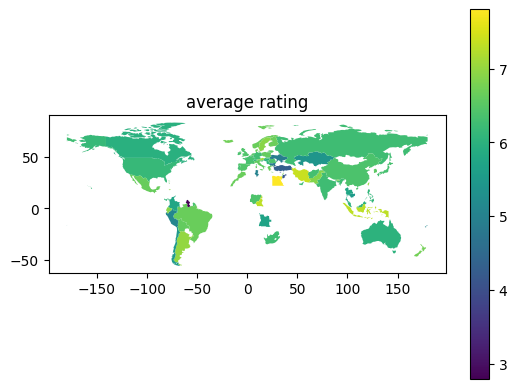

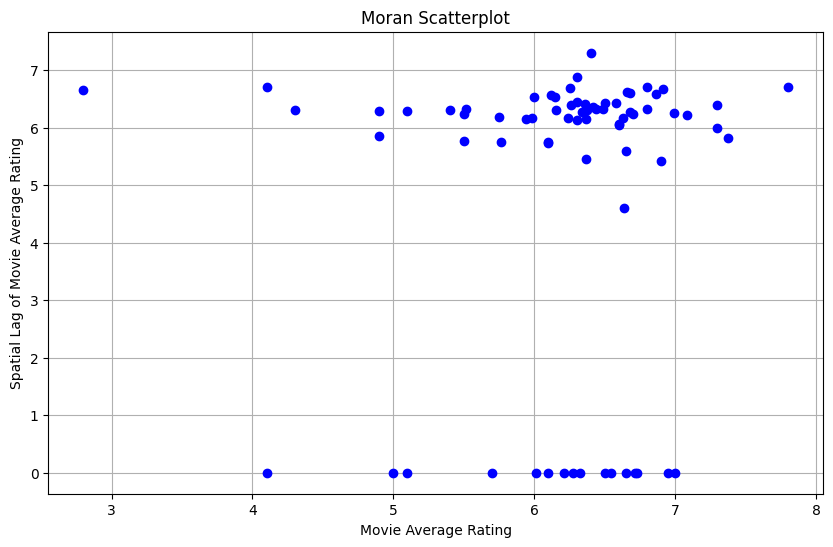

In [24]:
import geopandas
import pandas as pd
import geopandas as gpd
import libpysal
from libpysal import weights
from esda.moran import Moran
import json
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb_5000_movies.csv')

df = df[df['vote_average'] != 0]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def f(t):
  s = t['production_countries']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

country_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, country_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=country_split.columns)
df = df.groupby(['value'])['vote_average'].mean()
df = df.sort_index(ascending=False).rename('name')
df = pd.DataFrame(df, columns=['average_rating', 'name'])
df['average_rating'] = df['name']
df['name'] = df.index
world = world.merge(df)
g= world.plot('average_rating', legend=True)
g.set_title('average rating')


# Calculate spatial weights
w = weights.Queen.from_dataframe(world)

# Convert movie counts to an array
y = world['average_rating'].values

# Calculate Moran's I
mi = Moran(y, w)

# # Print Moran's I results
print("Moran's I:", mi.I)
print("Moran's I p-value:", mi.p_sim)

# Calculate spatial lag
sl = weights.spatial_lag.lag_spatial(w, y)

# Create Moran Scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y, sl, 'bo')
plt.xlabel('Movie Average Rating')
plt.ylabel('Spatial Lag of Movie Average Rating')
plt.title('Moran Scatterplot')
plt.grid(True)
plt.show()


C:\Users\rhyth\AppData\Local\Temp\ipykernel_42968\1685281513.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
C:\Users\rhyth\AppData\Local\Temp\ipykernel_42968\1685281513.py:37: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(world)
c:\Python311\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
 There are 15 islands with ids: 0, 7, 9, 11, 21, 24, 30, 33, 57, 58, 60, 64, 65, 70, 71.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
Moran's I: 0.5277238171423252
Moran's I p-value: 0.001


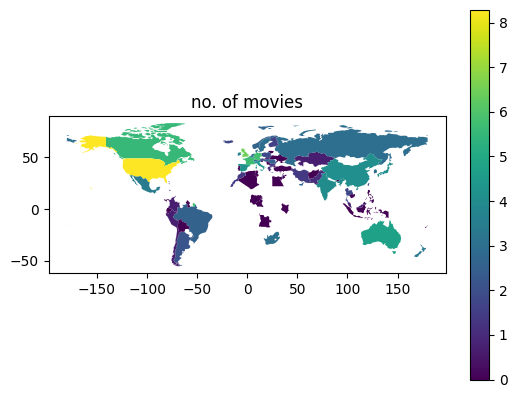

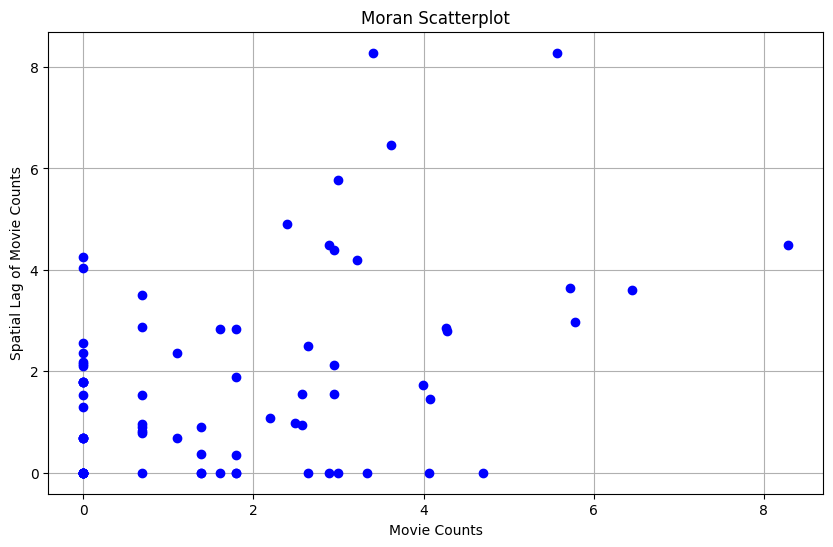

In [25]:
import geopandas
import pandas as pd
import geopandas as gpd
import libpysal
from libpysal import weights
from esda.moran import Moran
import json
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb_5000_movies.csv')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def f(t):
  s = t['production_countries']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

country_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, country_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=country_split.columns)
df = df.groupby(['value'])['vote_average'].count()
df = df.sort_index(ascending=False).rename('name')
df = pd.DataFrame(df, columns=['average_rating', 'name'])
df['average_rating'] = np.log(df['name'])
df['name'] = df.index
world = world.merge(df)
g= world.plot('average_rating', legend=True)
g.set_title('no. of movies')


# Calculate spatial weights
w = weights.Queen.from_dataframe(world)

# Convert movie counts to an array
y = world['average_rating'].values

# Calculate Moran's I
mi = Moran(y, w)

# # Print Moran's I results
print("Moran's I:", mi.I)
print("Moran's I p-value:", mi.p_sim)

# Calculate spatial lag
sl = weights.spatial_lag.lag_spatial(w, y)

# Create Moran Scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y, sl, 'bo')
plt.xlabel('Movie Counts')
plt.ylabel('Spatial Lag of Movie Counts')
plt.title('Moran Scatterplot')
plt.grid(True)
plt.show()
